<a href="https://colab.research.google.com/github/Induvardhan116/Induvardhan116/blob/SML/2303a52030_sml_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
d= pd.read_csv('/content/GOOG.csv')
d=d.dropna()
print(d)

     symbol                       date    close      high        low     open  \
0      GOOG  2016-06-14 00:00:00+00:00   718.27   722.470   713.1200   716.48   
1      GOOG  2016-06-15 00:00:00+00:00   718.92   722.980   717.3100   719.00   
2      GOOG  2016-06-16 00:00:00+00:00   710.36   716.650   703.2600   714.91   
3      GOOG  2016-06-17 00:00:00+00:00   691.72   708.820   688.4515   708.65   
4      GOOG  2016-06-20 00:00:00+00:00   693.71   702.480   693.4100   698.77   
...     ...                        ...      ...       ...        ...      ...   
1253   GOOG  2021-06-07 00:00:00+00:00  2466.09  2468.000  2441.0725  2451.32   
1254   GOOG  2021-06-08 00:00:00+00:00  2482.85  2494.495  2468.2400  2479.90   
1255   GOOG  2021-06-09 00:00:00+00:00  2491.40  2505.000  2487.3300  2499.50   
1256   GOOG  2021-06-10 00:00:00+00:00  2521.60  2523.260  2494.0000  2494.01   
1257   GOOG  2021-06-11 00:00:00+00:00  2513.93  2526.990  2498.2900  2524.92   

       volume  adjClose   a

In [ ]:
y=d['close']
y=y.dropna()
print(y)

0        718.27
1        718.92
2        710.36
3        691.72
4        693.71
         ...   
1253    2466.09
1254    2482.85
1255    2491.40
1256    2521.60
1257    2513.93
Name: close, Length: 1258, dtype: float64


In [ ]:
x=d.drop('open',axis=1)
x=x.dropna()
print(x)

     symbol                       date    close      high        low   volume  \
0      GOOG  2016-06-14 00:00:00+00:00   718.27   722.470   713.1200  1306065   
1      GOOG  2016-06-15 00:00:00+00:00   718.92   722.980   717.3100  1214517   
2      GOOG  2016-06-16 00:00:00+00:00   710.36   716.650   703.2600  1982471   
3      GOOG  2016-06-17 00:00:00+00:00   691.72   708.820   688.4515  3402357   
4      GOOG  2016-06-20 00:00:00+00:00   693.71   702.480   693.4100  2082538   
...     ...                        ...      ...       ...        ...      ...   
1253   GOOG  2021-06-07 00:00:00+00:00  2466.09  2468.000  2441.0725  1192453   
1254   GOOG  2021-06-08 00:00:00+00:00  2482.85  2494.495  2468.2400  1253253   
1255   GOOG  2021-06-09 00:00:00+00:00  2491.40  2505.000  2487.3300  1006337   
1256   GOOG  2021-06-10 00:00:00+00:00  2521.60  2523.260  2494.0000  1561733   
1257   GOOG  2021-06-11 00:00:00+00:00  2513.93  2526.990  2498.2900  1262309   

      adjClose   adjHigh   

Text(0.5, 1.0, 'Google Stock Price Prediction')

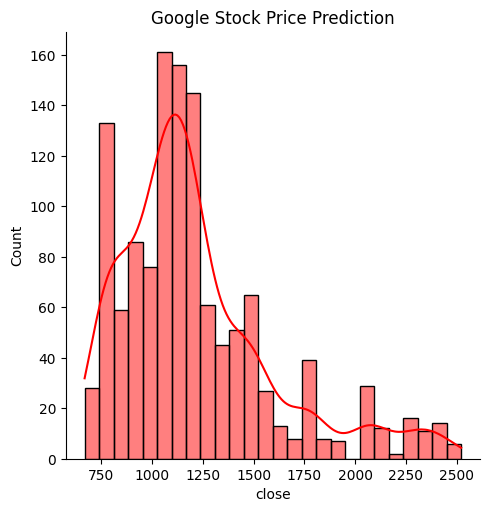

In [ ]:
import seaborn as sns
sns.displot(d.close,kde=True,color='red')
plt.title("Google Stock Price Prediction")

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
train, test = train_test_split(d, test_size = 20)
x_train = train.iloc[:, :20]
x_train=x_train.drop('open', axis=1)
x_train=x_train.dropna()
x_test = test.iloc[:, :20]
x_test=x_test.drop('open', axis=1)
x_test=x_test.dropna()
y_train = train['close']
y_train=y_train.dropna()
y_test = test['close']
y_test=y_test.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


train, test = train_test_split(d, test_size=20)

numerical_features = d.select_dtypes(include=np.number).columns.tolist()
if 'open' in numerical_features:
    numerical_features.remove('open')

x_train = train[numerical_features]
x_train = x_train.dropna()
x_test = test[numerical_features]
x_test = x_test.dropna()

y_train = train['close']
y_train = y_train.dropna()
y_test = test['close']
y_test = y_test.dropna()

imputer = SimpleImputer(strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

y_train = y_train.values.reshape(-1, 1)
y_train = imputer.fit_transform(y_train).ravel()

print(x_train.shape)
print(y_train.shape)

min_samples = min(x_train.shape[0], y_train.shape[0])
x_train = x_train[:min_samples]
y_train = y_train[:min_samples]

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

(1238, 11)
(1238,)


LinearRegression()

In [ ]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(x_train, y_train)

SVR()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)



print(x_train.shape)
print(y_train.shape)


min_samples = min(x_train.shape[0], y_train.shape[0])
x_train = x_train[:min_samples]
y_train = y_train[:min_samples]

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

from sklearn.svm import SVR
model_svr = SVR()


model_svr.fit(x_train, y_train)

y_pred_train = model_svr.predict(x_train)

min_samples_test = min(x_test.shape[0], y_test.shape[0])
x_test = x_test[:min_samples_test]
y_test = y_test[:min_samples_test]

y_pred_test= model_svr.predict(x_test)

print(f'train data MSE score SVR: {mean_squared_error(y_train,y_pred_train )}')
print(f'train data MAE score SVR: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score SVR: {root_mean_squared_error(y_train,y_pred_train )}')



print()
print(f'test data MSE score SVR: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score SVR: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score SVR: {root_mean_squared_error(y_test, y_pred_test)}')
print()

(1238, 11)
(1238,)
train data MSE score SVR: 151997.5033355269
train data MAE score SVR: 269.1700826652901
train data RMSE score SVR: 389.86857187458304

test data MSE score SVR: 255944.65920028556
test data MAE score SVR: 376.0322173530841
test data RMSE score SVR: 505.90973424148063



In [ ]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

Lasso()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)



print(x_train.shape)
print(y_train.shape)


min_samples = min(x_train.shape[0], y_train.shape[0])
x_train = x_train[:min_samples]
y_train = y_train[:min_samples]

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

from sklearn.svm import SVR
model_svr = SVR()


model_svr.fit(x_train, y_train)

y_pred_train = model_svr.predict(x_train)

min_samples_test = min(x_test.shape[0], y_test.shape[0])
x_test = x_test[:min_samples_test]
y_test = y_test[:min_samples_test]

y_pred_test= model_svr.predict(x_test)

print(f'train data MSE score SVR: {mean_squared_error(y_train,y_pred_train )}')
print(f'train data MAE score SVR: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score SVR: {root_mean_squared_error(y_train,y_pred_train )}')



print()
print(f'test data MSE score SVR: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score SVR: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score SVR: {root_mean_squared_error(y_test, y_pred_test)}')
print()

(1238, 11)
(1238,)
train data MSE score SVR: 151997.5033355269
train data MAE score SVR: 269.1700826652901
train data RMSE score SVR: 389.86857187458304

test data MSE score SVR: 255944.65920028556
test data MAE score SVR: 376.0322173530841
test data RMSE score SVR: 505.90973424148063



In [ ]:
from sklearn.linear_model import Lasso, Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)

Ridge()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

y_pred_ridge1 = model_ridge.predict(x_train)
y_pred_ridge = model_ridge.predict(x_test)

print(f'train data MSE score ridge: {mean_squared_error(y_train,y_pred_ridge1)}')
print(f'train data MAE score ridge: {mean_absolute_error(y_train,y_pred_ridge1 )}')
print(f'train data RMSE score ridge: {root_mean_squared_error(y_train,y_pred_ridge1)}')
print()
print(f'test data MSE score ridge: {mean_squared_error(y_test,y_pred_ridge)}')
print(f'test data MAE score ridge: {mean_absolute_error(y_test,y_pred_ridge )}')
print(f'test data RMSE score ridge: {root_mean_squared_error(y_test,y_pred_ridge)}')
print()

train data MSE score ridge: 2.9401821542850672e-09
train data MAE score ridge: 3.734186033172609e-05
train data RMSE score ridge: 5.422344653639297e-05

test data MSE score ridge: 2.7096768707590962e-09
test data MAE score ridge: 3.503777277842346e-05
test data RMSE score ridge: 5.205455667623245e-05



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error


def bootstrap_metrics_ridge(model, x_train, y_train, x_test, y_test, n_iterations=10):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):
        x_train_resampled, y_train_resampled = resample(x_train, y_train)
        model.fit(x_train_resampled, y_train_resampled)
        y_pred = model.predict(x_test)

        y_test_numeric = pd.to_numeric(y_test, errors='coerce')
        y_pred_numeric = pd.to_numeric(y_pred, errors='coerce')

        mask = ~np.isnan(y_test_numeric) & ~np.isnan(y_pred_numeric)
        y_test_numeric = y_test_numeric[mask]
        y_pred_numeric = y_pred_numeric[mask]

        mse_values.append(mean_squared_error(y_test_numeric, y_pred_numeric))
        mae_values.append(mean_absolute_error(y_test_numeric, y_pred_numeric))
        rmse_values.append(root_mean_squared_error(y_test_numeric, y_pred_numeric))

    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)

mse_ridge, mae_ridge, rmse_ridge = bootstrap_metrics_ridge(model_ridge, x_train, y_train, x_test, y_test)

print(f"Bootstrapped MSE for Ridge Regression: {mse_ridge.mean()}")
print(f"Confidence intervals for Ridge Regression MSE: {np.percentile(mse_ridge, [2.5, 97.5])}")
print(f"Bootstrapped MAE for Ridge Regression: {mae_ridge.mean()}")
print(f"Confidence intervals for Ridge Regression MAE: {np.percentile(mae_ridge, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for Ridge Regression: {rmse_ridge.mean()}")
print(f"Confidence intervals for Ridge Regression RMSE: {np.percentile(rmse_ridge, [2.5, 97.5])}")

Bootstrapped MSE for Ridge Regression: 2.849685129829402e-09
Confidence intervals for Ridge Regression MSE: [2.10794787e-09 3.42947121e-09]
Bootstrapped MAE for Ridge Regression: 3.599557831535094e-05
Confidence intervals for Ridge Regression MAE: [3.14875877e-05 3.99556893e-05]
Bootstrapped RMSE for Ridge Regression: 5.32216466456036e-05
Confidence intervals for Ridge Regression RMSE: [4.58717502e-05 5.85616845e-05]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
import pandas as pd
import numpy as np

model_knn = KNeighborsRegressor()

def bootstrap_metrics_knn(model, x_train, y_train, x_test, y_test, n_iterations=10):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):
        x_train_resampled, y_train_resampled = resample(x_train, y_train)
        model.fit(x_train_resampled, y_train_resampled)
        y_pred = model.predict(x_test)
        y_test_numeric = pd.to_numeric(y_test, errors='coerce')
        y_pred_numeric = pd.to_numeric(y_pred, errors='coerce')

        mask = ~np.isnan(y_test_numeric) & ~np.isnan(y_pred_numeric)
        y_test_numeric = y_test_numeric[mask]
        y_pred_numeric = y_pred_numeric[mask]

        mse_values.append(mean_squared_error(y_test_numeric, y_pred_numeric))
        mae_values.append(mean_absolute_error(y_test_numeric, y_pred_numeric))
        rmse_values.append(root_mean_squared_error(y_test_numeric, y_pred_numeric))

    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)

mse_knn, mae_knn, rmse_knn = bootstrap_metrics_knn(model_knn, x_train, y_train, x_test, y_test)


model_svr = SVR()
mse_svr, mae_svr, rmse_svr = bootstrap_metrics_knn(model_svr, x_train, y_train, x_test, y_test)

print(f"Bootstrapped MSE for SVR: {mse_svr.mean()}")
print(f"Confidence intervals for SVR MSE: {np.percentile(mse_svr, [2.5, 97.5])}")
print(f"Bootstrapped MAE for SVR: {mae_svr.mean()}")
print(f"Confidence intervals for SVR MAE: {np.percentile(mae_svr, [2.5, 97.5])}")
print(f"Bootstrapped RMSE for SVR: {rmse_svr.mean()}")
print(f"Confidence intervals for SVR RMSE: {np.percentile(rmse_svr, [2.5, 97.5])}")

Bootstrapped MSE for SVR: 254824.81843809597
Confidence intervals for SVR MSE: [251404.34020082 260016.56001955]
Bootstrapped MAE for SVR: 375.8224680167833
Confidence intervals for SVR MAE: [375.21181536 376.74488448]
Bootstrapped RMSE for SVR: 504.79382276178615
Confidence intervals for SVR RMSE: [501.40237214 509.91513654]


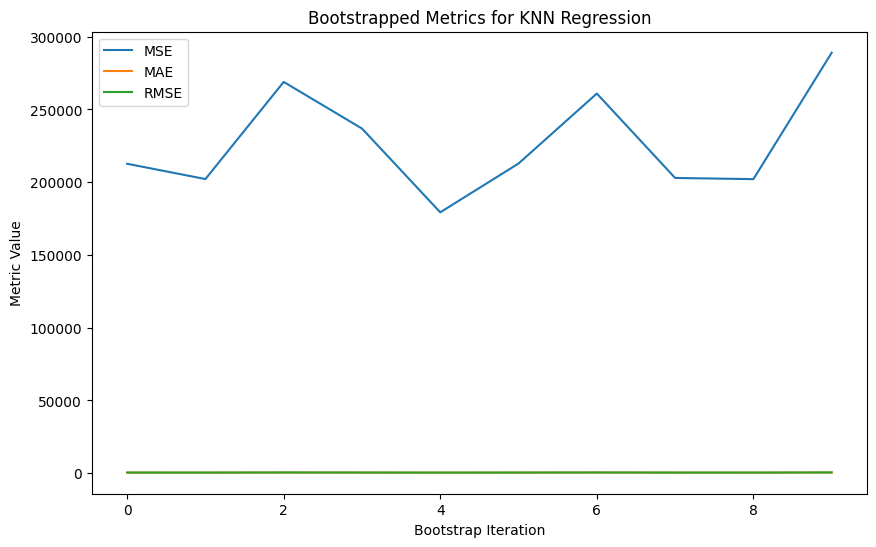

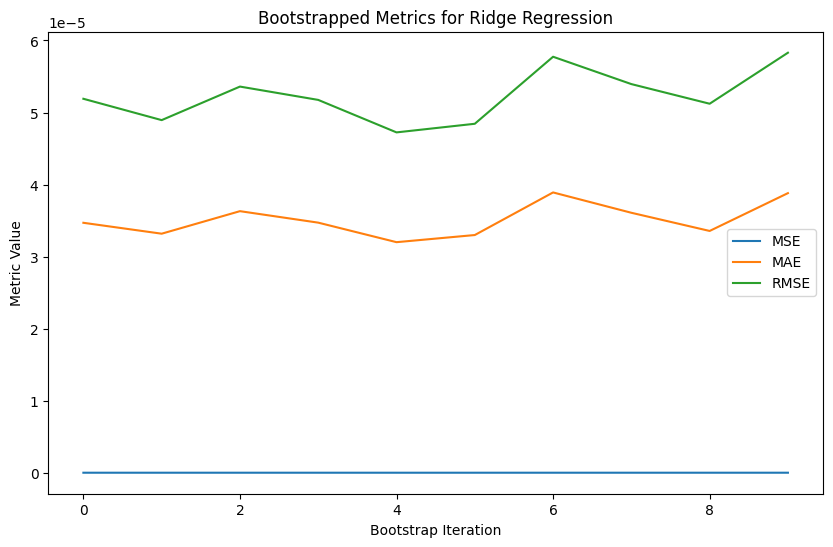

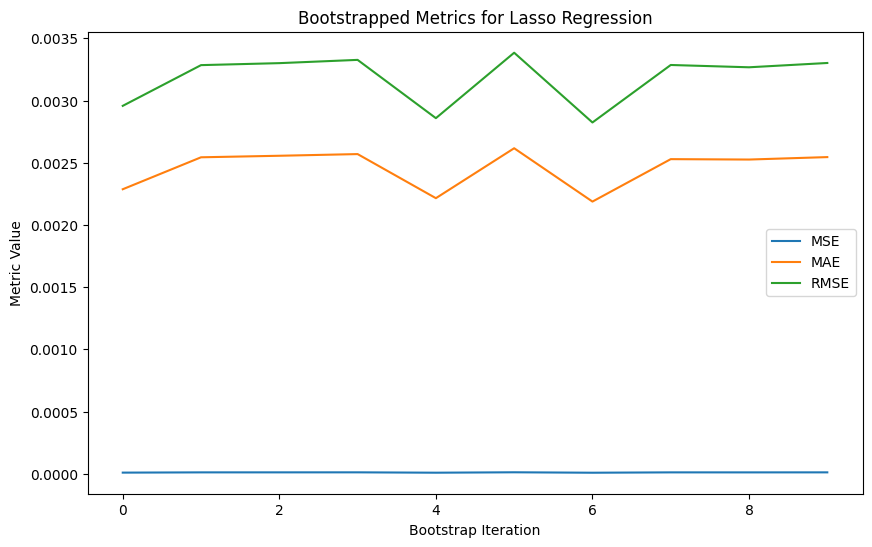

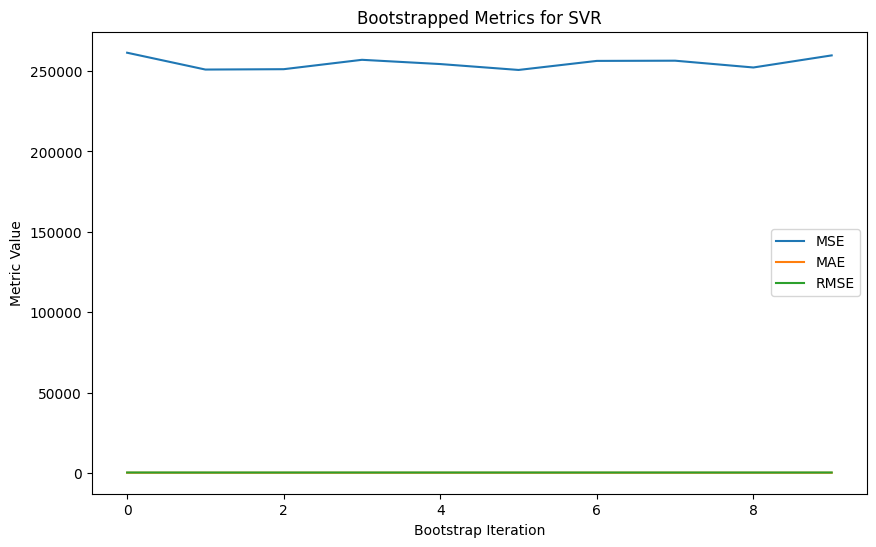

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR



model_knn = KNeighborsRegressor()
model_ridge = Ridge()
model_lasso = Lasso()
model_svr = SVR()

def bootstrap_metrics(model, x_train, y_train, x_test, y_test, n_iterations=10):
    mse_values = []
    mae_values = []
    rmse_values = []
    for _ in range(n_iterations):
        x_train_resampled, y_train_resampled = resample(x_train, y_train)
        model.fit(x_train_resampled, y_train_resampled)
        y_pred = model.predict(x_test)


        y_test_numeric = pd.to_numeric(y_test, errors='coerce')
        y_pred_numeric = pd.to_numeric(y_pred, errors='coerce')


        mask = ~np.isnan(y_test_numeric) & ~np.isnan(y_pred_numeric)
        y_test_numeric = y_test_numeric[mask]
        y_pred_numeric = y_pred_numeric[mask]

        mse_values.append(mean_squared_error(y_test_numeric, y_pred_numeric))
        mae_values.append(mean_absolute_error(y_test_numeric, y_pred_numeric))
        rmse_values.append(root_mean_squared_error(y_test_numeric, y_pred_numeric))

    return np.array(mse_values), np.array(mae_values), np.array(rmse_values)

mse_knn, mae_knn, rmse_knn = bootstrap_metrics(model_knn, x_train, y_train, x_test, y_test)
mse_ridge, mae_ridge, rmse_ridge = bootstrap_metrics(model_ridge, x_train, y_train, x_test, y_test)
mse_lasso, mae_lasso, rmse_lasso = bootstrap_metrics(model_lasso, x_train, y_train, x_test, y_test)
mse_svr, mae_svr, rmse_svr = bootstrap_metrics(model_svr, x_train, y_train, x_test, y_test)

def plot_metrics(mse, mae, rmse, title):
    plt.figure(figsize=(10, 6))
    plt.plot(mse, label='MSE')
    plt.plot(mae, label='MAE')
    plt.plot(rmse, label='RMSE')
    plt.xlabel('Bootstrap Iteration')
    plt.ylabel('Metric Value')
    plt.title(title)
    plt.legend()
    plt.show()

plot_metrics(mse_knn, mae_knn, rmse_knn, 'Bootstrapped Metrics for KNN Regression')
plot_metrics(mse_ridge, mae_ridge, rmse_ridge, 'Bootstrapped Metrics for Ridge Regression')
plot_metrics(mse_lasso, mae_lasso, rmse_lasso, 'Bootstrapped Metrics for Lasso Regression')
plot_metrics(mse_svr, mae_svr, rmse_svr, 'Bootstrapped Metrics for SVR')